# (IS388-D) Data Analysis - LEC



# Nama: Dasmond Tan
# NIM: 00000070110

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# a. Understanding and Data Preprocessing

In [2]:
data = pd.read_csv("Dataset_PatientTreatment.csv")
data = data.dropna()
data

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


In [3]:
data.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


In [4]:
data.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE           object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   4412 non-null   float64
 1   HAEMOGLOBINS  4412 non-null   float64
 2   ERYTHROCYTE   4412 non-null   float64
 3   LEUCOCYTE     4412 non-null   float64
 4   THROMBOCYTE   4412 non-null   int64  
 5   MCH           4412 non-null   float64
 6   MCHC          4412 non-null   float64
 7   MCV           4412 non-null   float64
 8   AGE           4412 non-null   int64  
 9   SEX           4412 non-null   object 
 10  SOURCE        4412 non-null   object 
dtypes: float64(7), int64(2), object(2)
memory usage: 379.3+ KB


# Handling Missing Values

In [6]:
data.isnull().sum()

HAEMATOCRIT     0
HAEMOGLOBINS    0
ERYTHROCYTE     0
LEUCOCYTE       0
THROMBOCYTE     0
MCH             0
MCHC            0
MCV             0
AGE             0
SEX             0
SOURCE          0
dtype: int64

# Handling Outliers

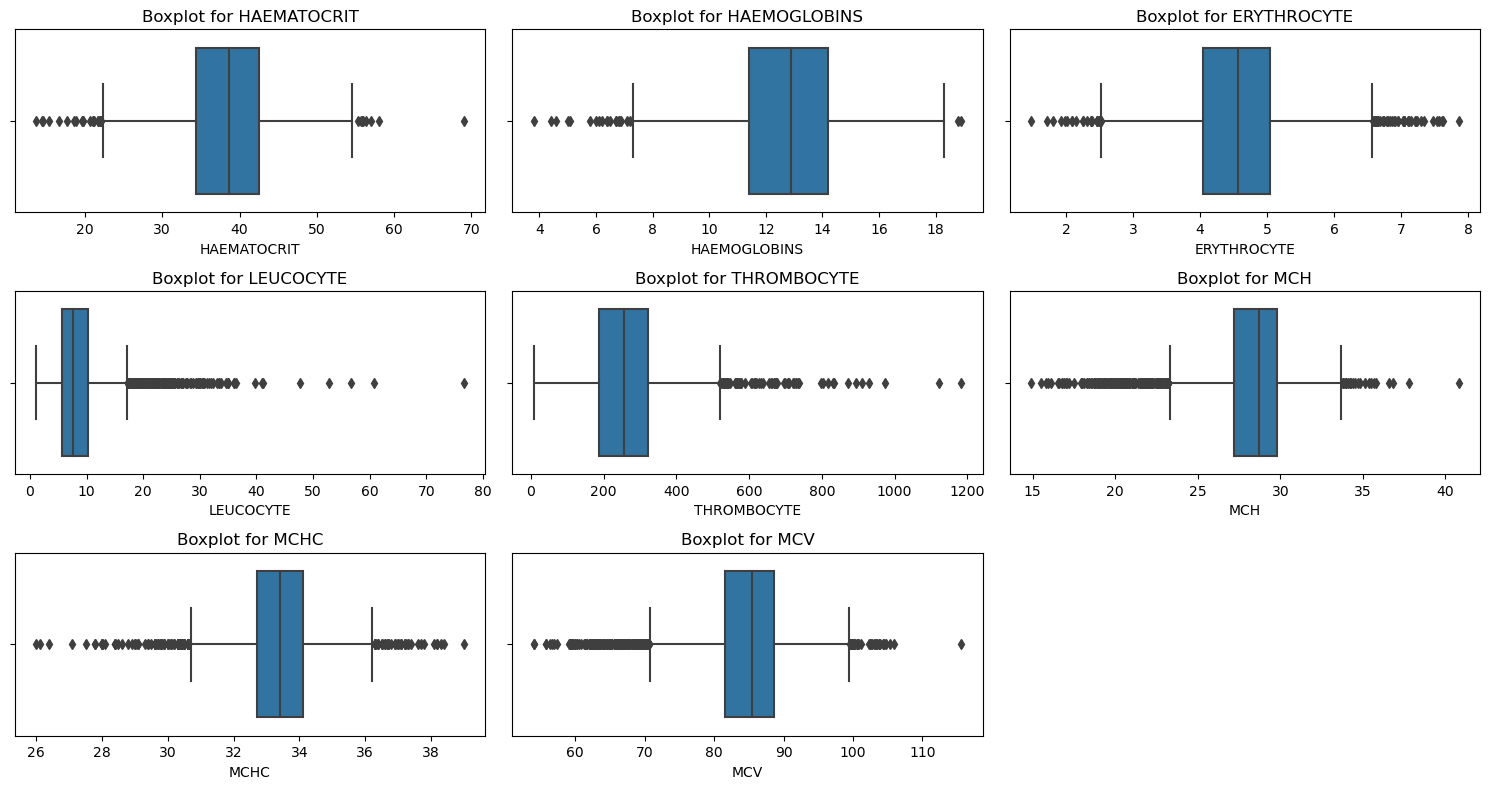

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_of_interest = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']
selected_data = data[columns_of_interest]

plt.figure(figsize=(15, 8))

numeric_columns = selected_data.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=selected_data[column])
    plt.title(f'Boxplot for {column}')

categorical_columns = selected_data.select_dtypes(include='object').columns
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i + len(numeric_columns))
    sns.boxplot(x=selected_data[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


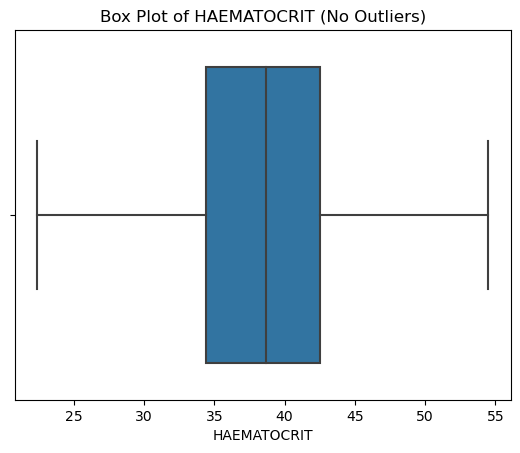

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['HAEMATOCRIT'].quantile(0.25)
Q3 = data['HAEMATOCRIT'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['HAEMATOCRIT'] < lower_bound) | (data['HAEMATOCRIT'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['HAEMATOCRIT'])
plt.xlabel('HAEMATOCRIT')
plt.title('Box Plot of HAEMATOCRIT (No Outliers)')
plt.show()


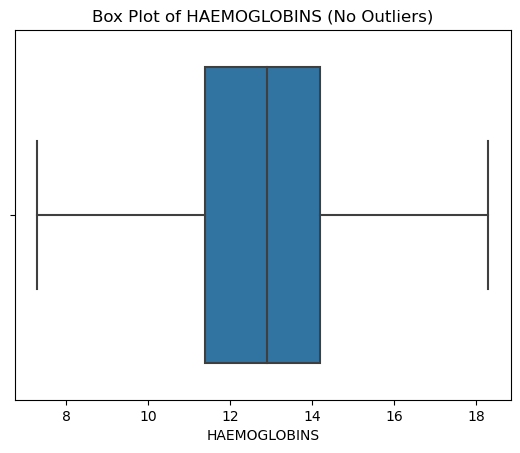

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['HAEMOGLOBINS'].quantile(0.25)
Q3 = data['HAEMOGLOBINS'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['HAEMOGLOBINS'] < lower_bound) | (data['HAEMOGLOBINS'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['HAEMOGLOBINS'])
plt.xlabel('HAEMOGLOBINS')
plt.title('Box Plot of HAEMOGLOBINS (No Outliers)')
plt.show()


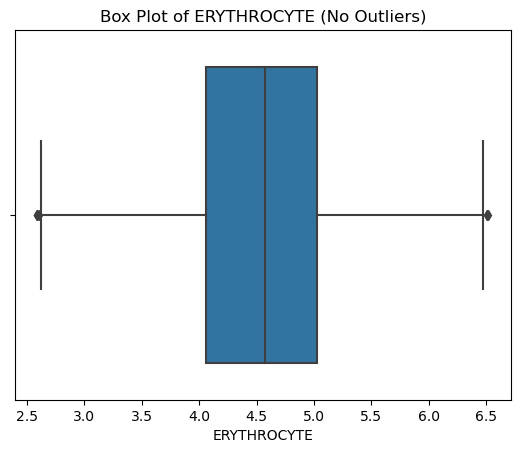

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['ERYTHROCYTE'].quantile(0.25)
Q3 = data['ERYTHROCYTE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['ERYTHROCYTE'] < lower_bound) | (data['ERYTHROCYTE'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['ERYTHROCYTE'])
plt.xlabel('ERYTHROCYTE')
plt.title('Box Plot of ERYTHROCYTE (No Outliers)')
plt.show()


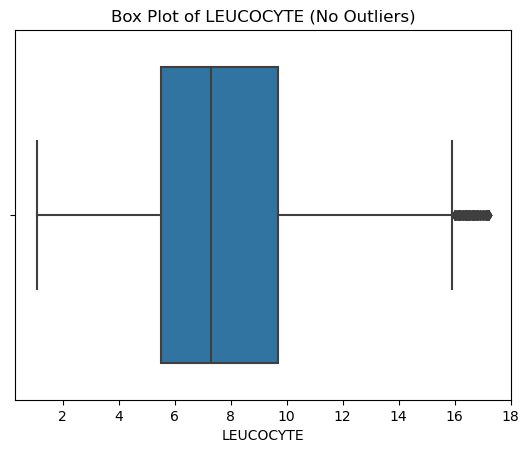

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['LEUCOCYTE'].quantile(0.25)
Q3 = data['LEUCOCYTE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['LEUCOCYTE'] < lower_bound) | (data['LEUCOCYTE'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['LEUCOCYTE'])
plt.xlabel('LEUCOCYTE')
plt.title('Box Plot of LEUCOCYTE (No Outliers)')
plt.show()


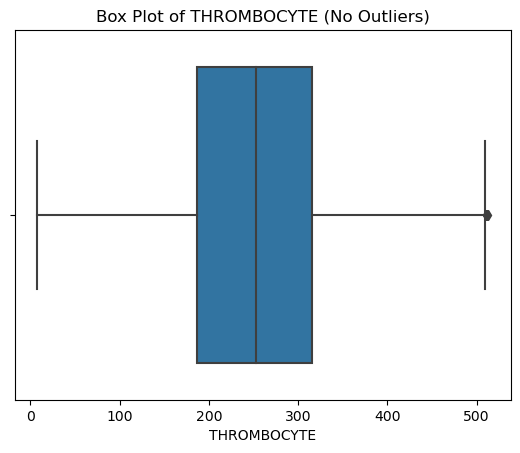

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['THROMBOCYTE'].quantile(0.25)
Q3 = data['THROMBOCYTE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['THROMBOCYTE'] < lower_bound) | (data['THROMBOCYTE'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['THROMBOCYTE'])
plt.xlabel('THROMBOCYTE')
plt.title('Box Plot of THROMBOCYTE (No Outliers)')
plt.show()

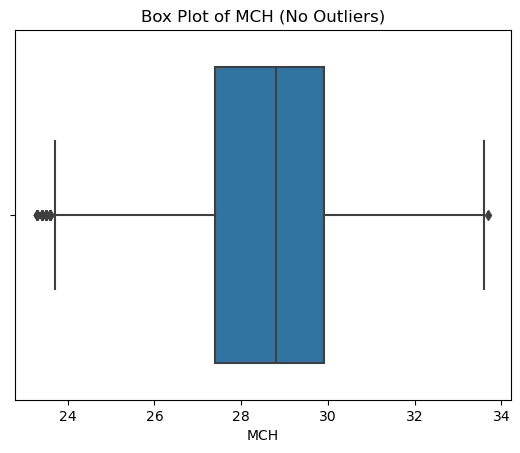

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['MCH'].quantile(0.25)
Q3 = data['MCH'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['MCH'] < lower_bound) | (data['MCH'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['MCH'])
plt.xlabel('MCH')
plt.title('Box Plot of MCH (No Outliers)')
plt.show()

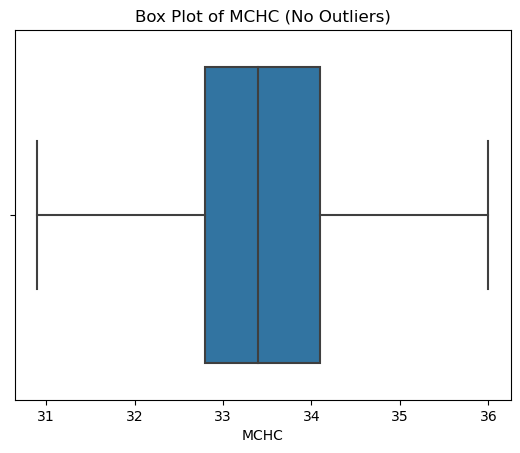

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['MCHC'].quantile(0.25)
Q3 = data['MCHC'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['MCHC'] < lower_bound) | (data['MCHC'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['MCHC'])
plt.xlabel('MCHC')
plt.title('Box Plot of MCHC (No Outliers)')
plt.show()


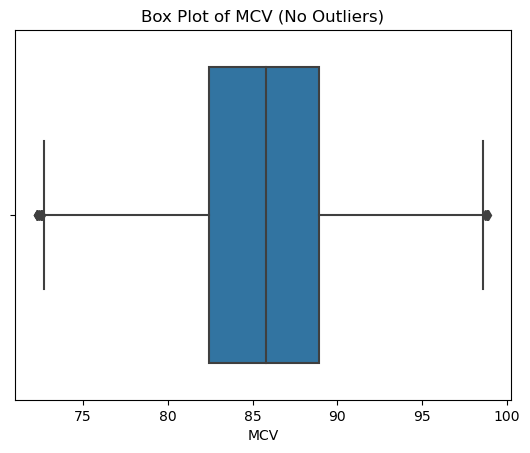

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = data['MCV'].quantile(0.25)
Q3 = data['MCV'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['MCV'] < lower_bound) | (data['MCV'] > upper_bound)

data = data[~outliers]

sns.boxplot(x=data['MCV'])
plt.xlabel('MCV')
plt.title('Box Plot of MCV (No Outliers)')
plt.show()


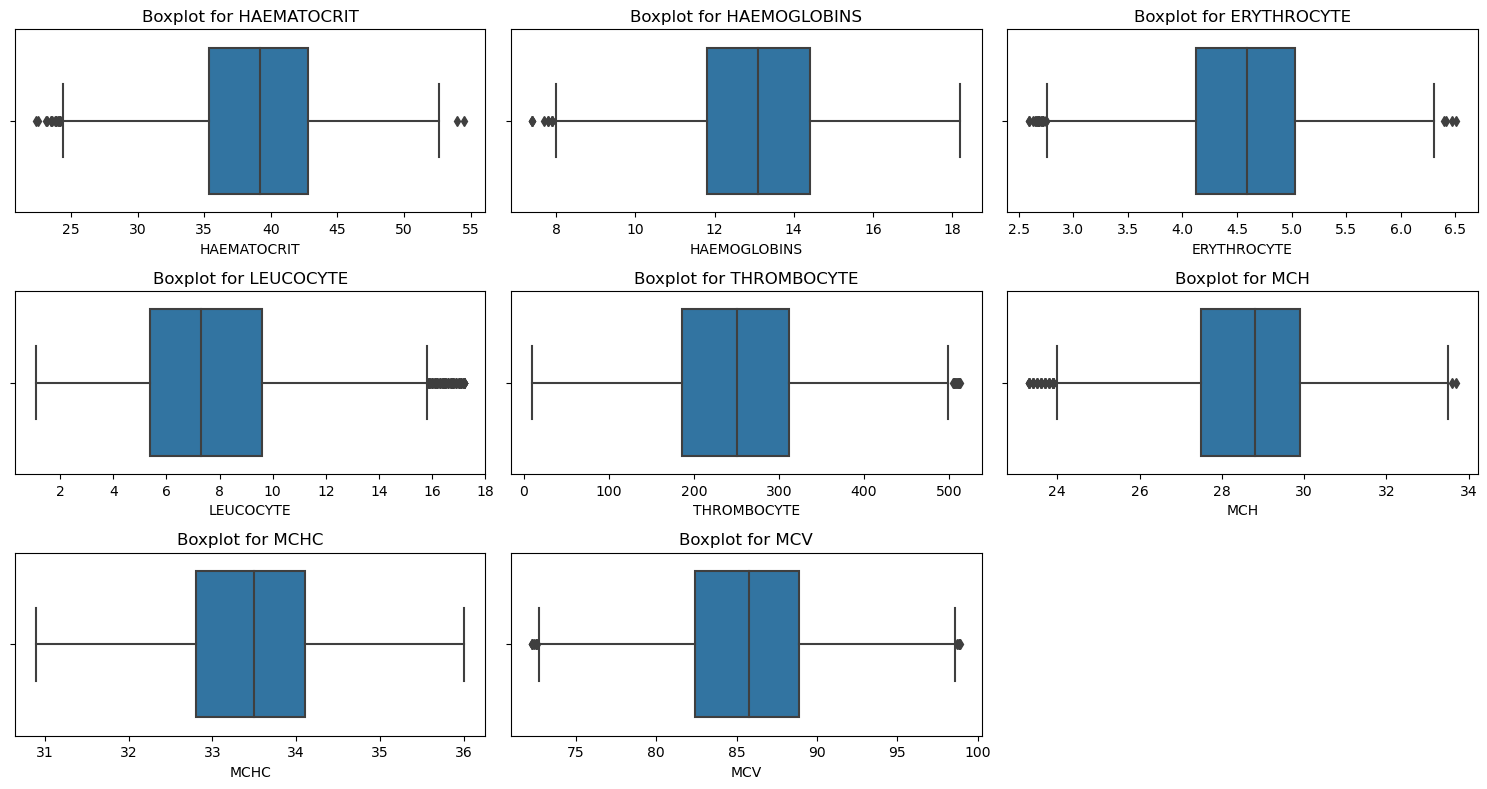

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_of_interest = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV']
selected_data = data[columns_of_interest]

plt.figure(figsize=(15, 8))

numeric_columns = selected_data.select_dtypes(include=['float64', 'int64']).columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=selected_data[column])
    plt.title(f'Boxplot for {column}')

categorical_columns = selected_data.select_dtypes(include='object').columns
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i + len(numeric_columns))
    sns.boxplot(x=selected_data[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()


# Formatting

In [17]:
data['THROMBOCYTE'] = data['THROMBOCYTE'].astype(float)
data.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE     float64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE           object
dtype: object

# Binning

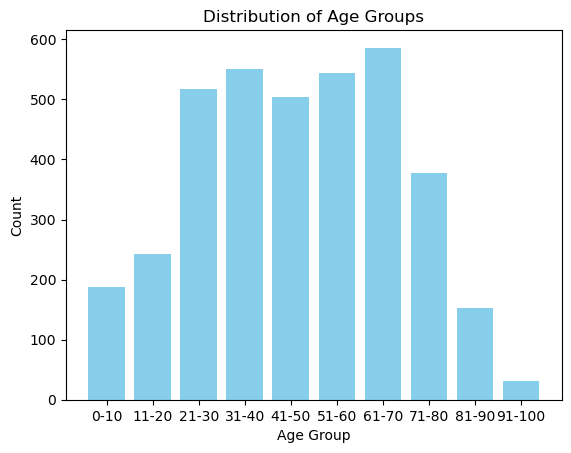

In [18]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data['AGE_group'] = pd.cut(data['AGE'].astype(float), bins=bins, labels=labels, right=False)

age_group_counts = data['AGE_group'].value_counts()
age_group_counts = age_group_counts.reindex(labels)

plt.bar(age_group_counts.index, age_group_counts.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

# Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['SOURCE'] = label_encoder.fit_transform(data['SOURCE'])
data['SEX'] = label_encoder.fit_transform(data['SEX'])
print(data['SEX'])

0       0
1       0
3       0
5       1
7       0
       ..
4406    0
4407    0
4408    0
4409    0
4411    0
Name: SEX, Length: 3693, dtype: int32


# Grouping 

In [20]:
grouped_by_sex_source = data.groupby(['SEX', 'SOURCE'])
value_counts_by_group = grouped_by_sex_source['SEX'].value_counts()
print(value_counts_by_group)

SEX  SOURCE  SEX
0    0       0       652
     1       0      1142
1    0       1       766
     1       1      1133
Name: SEX, dtype: int64


# b. Data Visualization

Heatmap

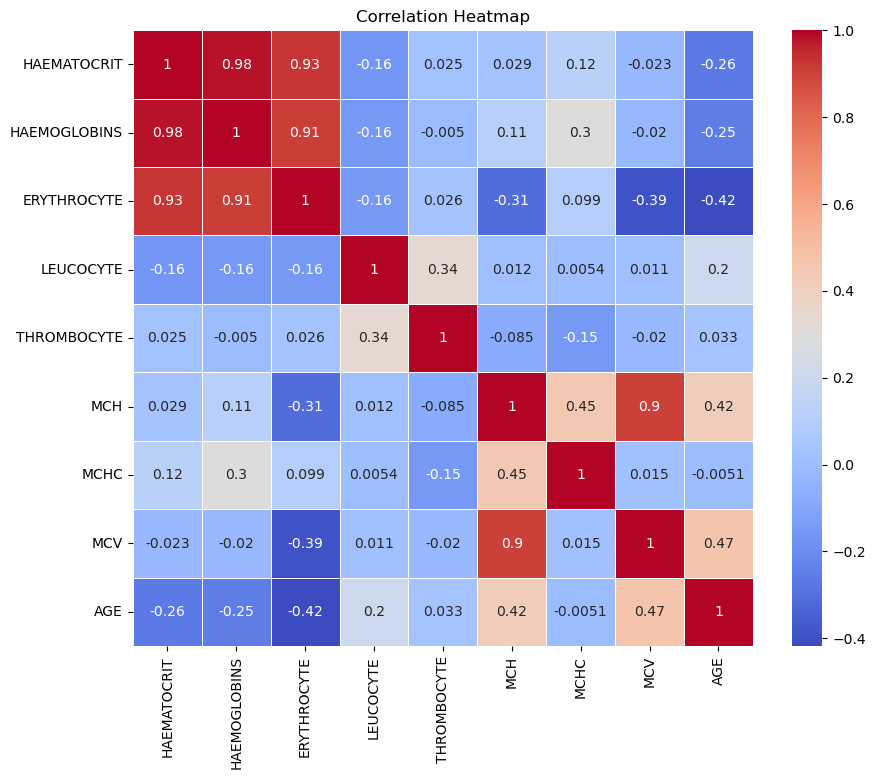

In [21]:
columns_of_interest = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']
selected_data = data[columns_of_interest]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Histogram

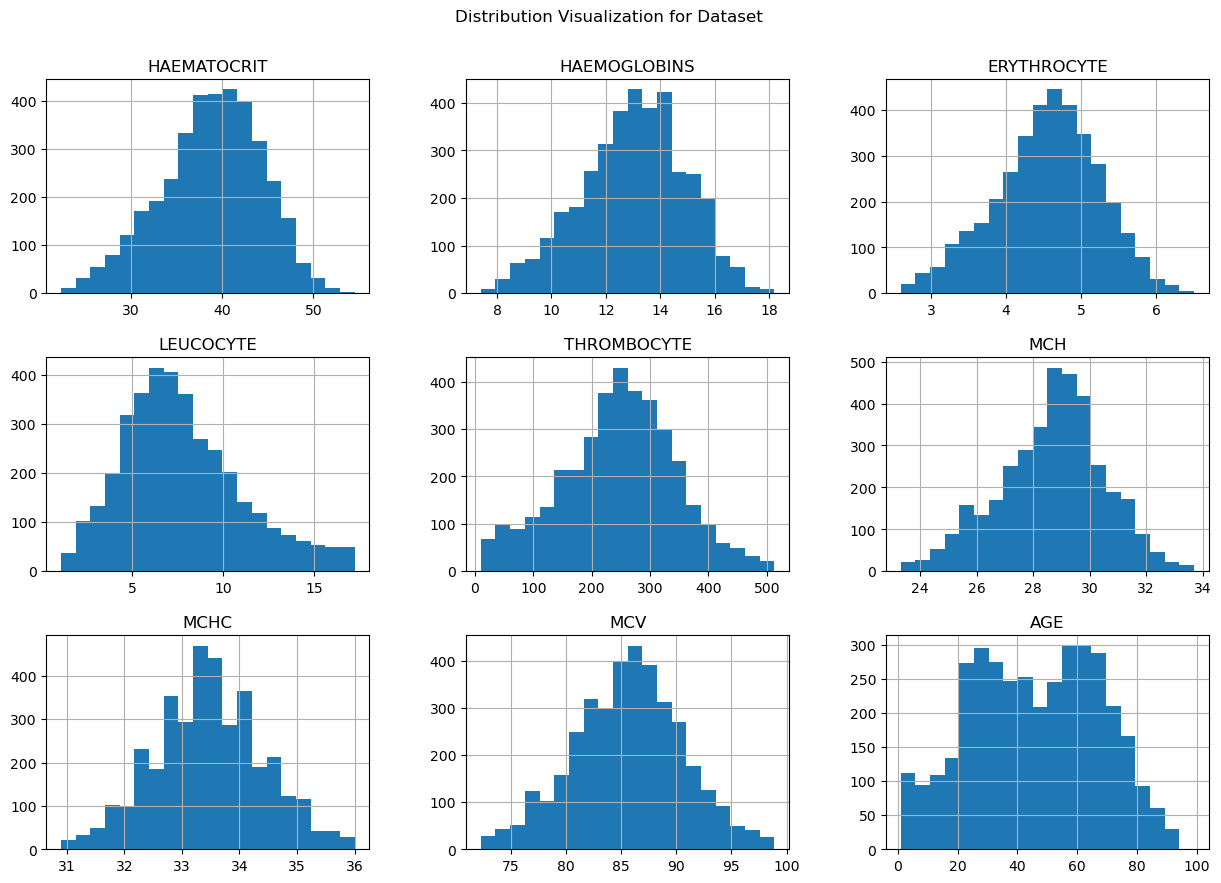

In [22]:
columns_of_interest = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']
selected_data = data[columns_of_interest]

selected_data.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution Visualization for Dataset', y=0.95)
plt.show()


Pie chart

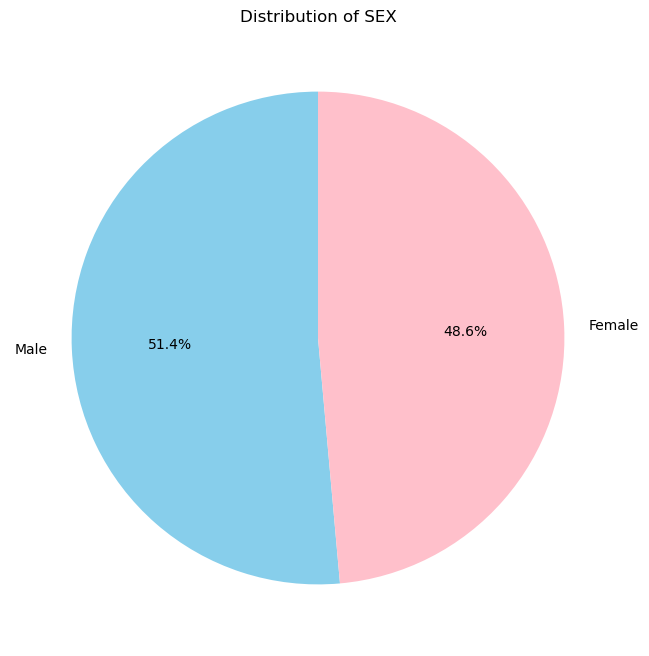

In [23]:
sex_counts = data['SEX'].value_counts()

labels = ['Male', 'Female']
colors = ['skyblue', 'pink']
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of SEX')
plt.show()

Barplot

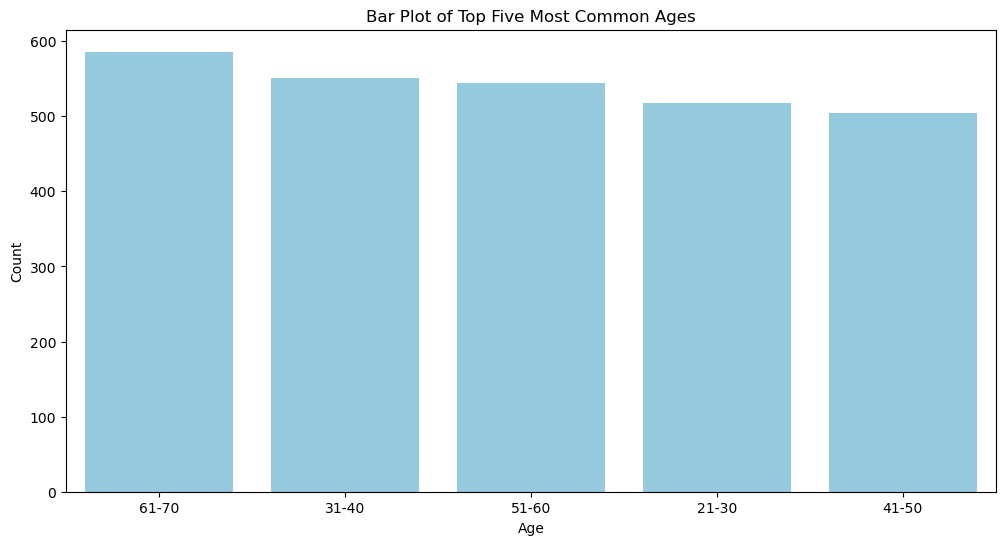

In [24]:
plt.figure(figsize=(12, 6))
top_five_ages = data['AGE_group'].value_counts().nlargest(5).index
sns.countplot(data=data[data['AGE_group'].isin(top_five_ages)], x='AGE_group', color='skyblue', order=top_five_ages)

plt.title('Bar Plot of Top Five Most Common Ages')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

Scatter Plot

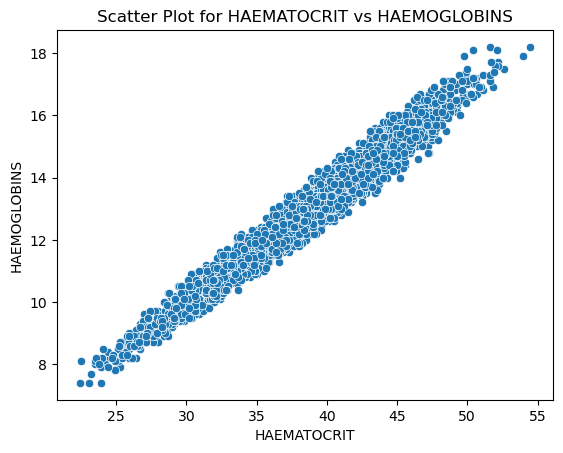

In [25]:
columns_of_interest = ['HAEMATOCRIT', 'HAEMOGLOBINS']

sns.scatterplot(data=data[columns_of_interest], x='HAEMATOCRIT', y='HAEMOGLOBINS')
plt.title('Scatter Plot for HAEMATOCRIT vs HAEMOGLOBINS')
plt.show()


# c. Modelling

# 1. Selection of Machine Learning Technique

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn.tree as tree

In [27]:
X = data[['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 
          'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE','SEX']].values
X

array([[35.1 , 11.8 ,  4.65, ..., 75.5 ,  1.  ,  0.  ],
       [43.5 , 14.8 ,  5.39, ..., 80.7 ,  1.  ,  0.  ],
       [39.1 , 13.7 ,  4.98, ..., 78.5 ,  1.  ,  0.  ],
       ...,
       [33.7 , 10.8 ,  3.67, ..., 91.8 , 92.  ,  0.  ],
       [33.2 , 11.2 ,  3.47, ..., 95.7 , 93.  ,  0.  ],
       [33.5 , 10.9 ,  3.44, ..., 97.4 , 99.  ,  0.  ]])

In [28]:
y = data["SOURCE"]
y

0       1
1       1
3       1
5       1
7       1
       ..
4406    0
4407    0
4408    0
4409    1
4411    1
Name: SOURCE, Length: 3693, dtype: int32

In [29]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [30]:
print('Shape of X training set {}'.format(X_trainset.shape),
     '&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (2585, 10) &  Size of Y training set (2585,)


# 2. Implementation and Configuration of the Algorithm

In [31]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_trainset, y_trainset)
predTree = drugTree.predict(X_testset)

In [32]:
predTree = drugTree.predict(X_testset)

In [33]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
2107    1
4033    1
2034    0
1021    1
3609    0
Name: SOURCE, dtype: int32


# d. Evaluation Technique

In [34]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        
        cm =cm.astype('object') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')            
    print(cm)
    
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] >thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

C:\Users\MSI BRAVO 15\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 640x480 with 0 Axes>

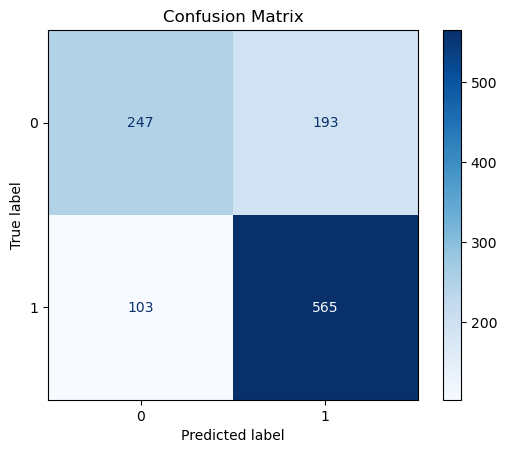

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.56      0.63       440
           1       0.75      0.85      0.79       668

    accuracy                           0.73      1108
   macro avg       0.73      0.70      0.71      1108
weighted avg       0.73      0.73      0.73      1108

Precision: 0.7454
F1-Score: 0.7924


In [35]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

plt.figure()
plot_confusion_matrix(drugTree, X_testset, y_testset, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_testset, predTree))

precision = precision_score(y_testset, predTree)
f1 = f1_score(y_testset, predTree)

print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


# e. Model Evaluation and Improvement

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler() 
X_normalized = scaler.fit_transform(X)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

Confusion matrix, without normalization
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.71      0.62      0.66       282
           1       0.78      0.84      0.81       457

    accuracy                           0.76       739
   macro avg       0.75      0.73      0.74       739
weighted avg       0.76      0.76      0.76       739

Precision (Random Forest): 0.7557
F1-Score (Random Forest): 0.7557


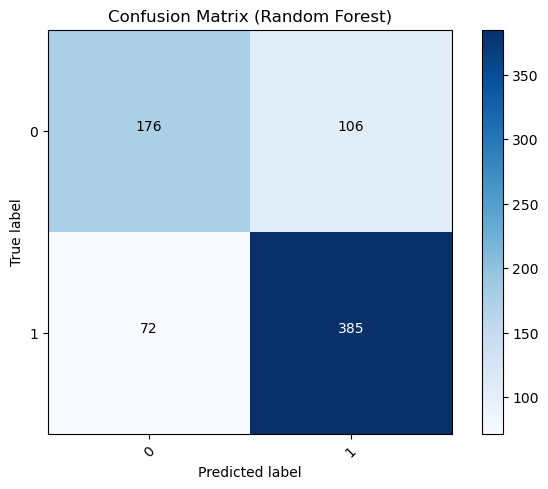

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

rf_model = RandomForestClassifier(random_state=3)
rf_model.fit(X_trainset, y_trainset)
rf_pred = rf_model.predict(X_testset)
cm_rf = confusion_matrix(y_testset, rf_pred)

plt.figure()
plot_confusion_matrix(cm_rf, classes=rf_model.classes_, title='Confusion Matrix (Random Forest)')

print("Classification Report (Random Forest):")
print(classification_report(y_testset, rf_pred))

precision_rf = precision_score(y_testset, rf_pred, average='weighted')
f1_rf = f1_score(y_testset, rf_pred, average='weighted')

print(f"Precision (Random Forest): {precision_rf:.4f}")
print(f"F1-Score (Random Forest): {f1_rf:.4f}")
plt.show()